# 판다스 기초를 배워보자

In [1]:
# import pandas
import pandas as pd

## Series
1개 컬럼 값으로 구성된 1차원 데이터 셋

In [2]:
data = ["A", "B", "C","D"]
se = pd.Series(data)
se

0    A
1    B
2    C
3    D
dtype: object

In [3]:
se.index  # 0에서 시작해서, 4개가 있고, 1씩 커진다

RangeIndex(start=0, stop=4, step=1)

In [4]:
se.values

array(['A', 'B', 'C', 'D'], dtype=object)

In [5]:
# indexing
print(se[1])
print(se[3])

B
D


In [6]:
# slicing
print(se[:3])
print(se[0:3]) # 위와 동일
print(se[:])  # 전체 다 가져옴

0    A
1    B
2    C
dtype: object
0    A
1    B
2    C
dtype: object
0    A
1    B
2    C
3    D
dtype: object


In [7]:
# 컬럼 이름 변경
se.name = "alphabet"
se

0    A
1    B
2    C
3    D
Name: alphabet, dtype: object

In [8]:
# 인덱스 이름 설정
se.index.name = "No."
se

No.
0    A
1    B
2    C
3    D
Name: alphabet, dtype: object

In [9]:
# Series 생성 시 index 지정하기
data = ["A", "B", "C","D"]

se = pd.Series(data, index=['a','b','c','d'])
se

a    A
b    B
c    C
d    D
dtype: object

In [10]:
se['a']  # index 값으로 가져오기

'A'

In [11]:
data = ["A","B","C","D"]
se = pd.Series(data)
se

0    A
1    B
2    C
3    D
dtype: object

In [12]:
# Series 생성 이후 index 지정하기 (덮어쓰기)
se.index=[1,2,3,4]
se

1    A
2    B
3    C
4    D
dtype: object

In [13]:
#se > 40

TypeError: '>' not supported between instances of 'str' and 'int'

# DataFrame

In [14]:
import numpy as np

data = np.array([[1,2,3], [4,5,6], [7,8,9]])
column = ['D','E','F']

df = pd.DataFrame(data=data, index =['A','B','C'], columns=column)
df

# df = pd.read_csv('./filename.csv')

,D,E,F
A,1,2,3
B,4,5,6
C,7,8,9


In [15]:
# DataFrame 생성

data = {
    'country': ["kor", "usa", "china", "japan"],
    'rank': [1,2,3,4],
    'grade': ["A","B","C","D"]
}

# print(data)
df = pd.DataFrame(data)
df

,country,rank,grade
0,kor,1,A
1,usa,2,B
2,china,3,C
3,japan,4,D


In [16]:
# (1) DataFrame 생성시 인덱스 지정
df = pd.DataFrame(data, index = ["A","B","C","D"])
df

,country,rank,grade
A,kor,1,A
B,usa,2,B
C,china,3,C
D,japan,4,D


In [17]:
# (2) df.index로 인덱스 지정
df.index = ["A","B","C","D"]
df  # -> 여기서는 index명이 없었다  

,country,rank,grade
A,kor,1,A
B,usa,2,B
C,china,3,C
D,japan,4,D


In [18]:
# (3) df.set_index로 인덱스 지정
df = df.set_index('grade')  
# df = df.set_index(['grade','rank','country'])  # index 여러개 지정 가능
df

,country,rank
grade,,
A,kor,1
B,usa,2
C,china,3
D,japan,4


## 데이터 셀렉션
DataFrame에서 값을 불러오는 방법
1. [ ]
    - df.컬럼, df.['컬럼'], df[1:3]

2. loc[인덱스명, 컬럼명]  # 사람이 읽을 수 있음

3. iloc[인덱스, 컬럼인덱스]  #위치 기반 인덱싱 

In [19]:
# DataFrame 생성

data = {
    'country': ["kor", "usa", "china", "japan"],
    'rank': [1,2,3,4],
    'grade': ["A","B","C","D"]
}

# print(data)
df = pd.DataFrame(data)
df

,country,rank,grade
0,kor,1,A
1,usa,2,B
2,china,3,C
3,japan,4,D


In [20]:
# (1) df.컬럼, df['컬럼']

## 하나의 컬럼 조회
df.country

0      kor
1      usa
2    china
3    japan
Name: country, dtype: object

In [21]:
print(df['country'])
df[['country']]  # 원래는 이렇게 생긴건데 하나니까 위에처럼 [] 생략해주는 것임

0      kor
1      usa
2    china
3    japan
Name: country, dtype: object


,country
0,kor
1,usa
2,china
3,japan


In [22]:
## 둘 이상의 컬럼 조회
print(df[['country', 'grade']])  # 두개 가지고 오고 싶으면 

  country grade
0     kor     A
1     usa     B
2   china     C
3   japan     D


In [23]:
# (2) loc[인덱스명, 컬럼명]

## 인덱스 값이 0인 행 조회
df.loc[0]

country    kor
rank         1
grade        A
Name: 0, dtype: object

In [24]:
## 2개 이상의 행 조회
df.loc[0:2]

,country,rank,grade
0,kor,1,A
1,usa,2,B
2,china,3,C


In [25]:
print(df.loc[[0,2]]) # 인덱스 값 0,2 행 가져오기

# df.loc[[0,2,4,6,8,10]] # 짝수만 가져오려면, 인덱스 값 가져와서 뽑으면 됨

  country  rank grade
0     kor     1     A
2   china     3     C


In [26]:
df.loc[0, 'grade'] # [행, 열]의 좌표 -> gks wnf rkwudhrl

'A'

In [27]:
df.loc[0:2, ['country', 'grade']]  # 0행 ~ 2행 범위 지정 가능, 원하는 데이터 country, grade만 가져와 

,country,grade
0,kor,A
1,usa,B
2,china,C


In [28]:
df['grade']=="A"

0     True
1    False
2    False
3    False
Name: grade, dtype: bool

In [29]:
df.loc[(df['grade']=="A")]

,country,rank,grade
0,kor,1,A


In [30]:
df['rank'] > 2

0    False
1    False
2     True
3     True
Name: rank, dtype: bool

In [31]:
df.loc[df['rank'] > 2]

,country,rank,grade
2,china,3,C
3,japan,4,D


In [32]:
df.loc[(df['grade']=="A") | (df['rank'] > 2)]

,country,rank,grade
0,kor,1,A
2,china,3,C
3,japan,4,D


In [33]:
# (3) iloc[인덱스, 컬럼인덱스] - 위치(location) 기반

df.loc[0] # 전체 데이터 프레임에서 인덱스 이름이 0인 행 데이터

country    kor
rank         1
grade        A
Name: 0, dtype: object

In [35]:
df.loc[0:2]  # 3행의 데이터 # 전체 데이터 프레임에서 0번째 행에 있는 값


,country,rank,grade
0,kor,1,A
1,usa,2,B
2,china,3,C


In [60]:
print(df.loc[[0,1,2,3]] ) # index 값
df.iloc[0:3]

  country  rank grade
0     kor     1     A
1     usa     2     B
2   china     3     C
3   japan     4     D


,country,rank,grade
0,kor,1,A
1,usa,2,B
2,china,3,C


In [63]:
df.iloc[0:3, 1]

0    1
1    2
2    3
Name: rank, dtype: int64

In [37]:
df.iloc[0:3, 0:2]  # 행, 열  # iloc는 무조건 정수기반

,country,rank
0,kor,1
1,usa,2
2,china,3


## QUIZ
> 한국과 일본 'rank'랑 'grade'만 가져오기
1. iloc 사용
2. loc 사용

In [48]:
df

,country,rank,grade
0,kor,1,A
1,usa,2,B
2,china,3,C
3,japan,4,D


In [58]:
# iloc로 불러오기 -> 인덱스 값

df.iloc[[0,3],[1,2]]

,rank,grade
0,1,A
3,4,D


In [65]:
df.iloc[[0,3],1:3] # 이 방법도 가능 ! 

,rank,grade
0,1,A
3,4,D


In [71]:
df.iloc[[0,3],[0:1, 1:2]] # 이렇게는 불가능 

SyntaxError: invalid syntax (1216779615.py, line 1)

In [57]:
# loc로 불러오기 -> 인덱스 명

df.loc[[0,3],['rank','grade']]

,rank,grade
0,1,A
3,4,D


## 다시 이론 ~

In [64]:
# (4) Boolean 인덱싱
df['rank'] < 3

0     True
1     True
2    False
3    False
Name: rank, dtype: bool

## filter() 이용
- 모르는거는 뒤에 ? 물음표 붙이면 됨 !
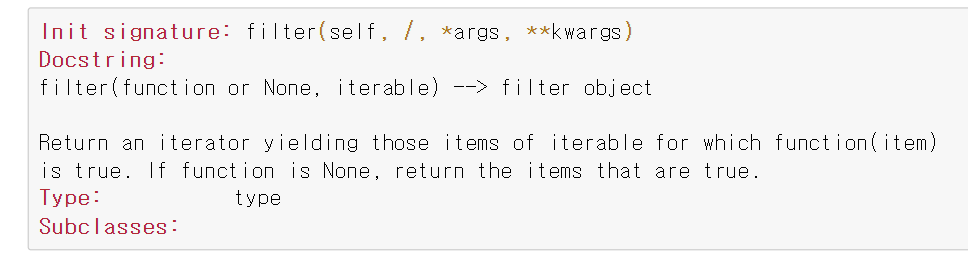

In [72]:
filter?

In [74]:
# 어떻게 쓰는지 모를 때 물음표 붙이면 예제 팝업창 뜸
df.filter?

### axis = 0 : column 열
### axis = 1 : row 행

In [77]:
df.filter(like='c', axis=0) # 인덱스에 c 가 들어가는 것 검색 # 열

,country,rank,grade


In [78]:
df.filter(like='r', axis=1) # 컬럼명에 r이 들어가는 것 모두 찾아줘 # 행 -> 모두 나옴

,country,rank,grade
0,kor,1,A
1,usa,2,B
2,china,3,C
3,japan,4,D


In [129]:
# DataFrame 생성

data = {
    'country': ["kor", "usa", "china", "japan"],
    'rank': [1,2,3,4],
    'grade': ["A","B","C","D"]
}

# print(data)
df = pd.DataFrame(data)
df

,country,rank,grade
0,kor,1,A
1,usa,2,B
2,china,3,C
3,japan,4,D


In [130]:
## (!) Series를 이용하여 열 데이터 추가
president = pd.Series(["yoon", "biden", "kishida", "jinping"], index=[0,1,2,3])
print(president)

gdp = pd.Series(["1000", "2000", "3000", "4000"], index=[0,1,2,3])  # -> gdp도 추가
print(gdp)

df['president'] = president  # dataframe에 president column 추가
df

0       yoon
1      biden
2    kishida
3    jinping
dtype: object
0    1000
1    2000
2    3000
3    4000
dtype: object


,country,rank,grade,president
0,kor,1,A,yoon
1,usa,2,B,biden
2,china,3,C,kishida
3,japan,4,D,jinping


In [131]:
## (2) numpy를 이용하여 열 데이터 추가
import numpy as np

add = np.zeros(4).astype(int)
# pd.Series([0, 0, 0, 0], index=[0,1,2,3])  # 위에 줄이 이거랑 똑같음
df['etc'] = add
df

,country,rank,grade,president,etc
0,kor,1,A,yoon,0
1,usa,2,B,biden,0
2,china,3,C,kishida,0
3,japan,4,D,jinping,0


In [132]:
## (3) 연산을 이용하여 행 데이터 추가
df['rank'] < 3
df['new_grade'] = df['rank'] < 3
df

,country,rank,grade,president,etc,new_grade
0,kor,1,A,yoon,0,True
1,usa,2,B,biden,0,True
2,china,3,C,kishida,0,False
3,japan,4,D,jinping,0,False


In [133]:
# df.loc[:4] = ['singapore', 4, "D", "jao", 0, False]  # 다 바뀜
# df

In [134]:
## (4) loc()를 이용하여 행 데이터 추가

df.loc[7] = ['singapore', 4, "D", "jao", 0, False]
df

,country,rank,grade,president,etc,new_grade
0,kor,1,A,yoon,0,True
1,usa,2,B,biden,0,True
2,china,3,C,kishida,0,False
3,japan,4,D,jinping,0,False
7,singapore,4,D,jao,0,False


In [135]:
# df.loc[3] = ['singapore', 4, "D", "jao", 0, False]  # 인덱스 값 같으면 데이터 덮어씌여짐
# df

In [136]:
df.loc[4] = ['singapore', 4, "D", "jao", 0, False]
df

,country,rank,grade,president,etc,new_grade
0,kor,1,A,yoon,0,True
1,usa,2,B,biden,0,True
2,china,3,C,kishida,0,False
3,japan,4,D,jinping,0,False
7,singapore,4,D,jao,0,False
4,singapore,4,D,jao,0,False


In [137]:
#df.reset_index()  # ascending=True 옵션 안주면 default가 false여서 안바뀜
df = df.reset_index()  # 옵션 안줄거면 이렇게 df에 다시 담아줘야 함
df

,index,country,rank,grade,president,etc,new_grade
0,0,kor,1,A,yoon,0,True
1,1,usa,2,B,biden,0,True
2,2,china,3,C,kishida,0,False
3,3,japan,4,D,jinping,0,False
4,7,singapore,4,D,jao,0,False
5,4,singapore,4,D,jao,0,False


## dataFrame 데이터 삭제

In [138]:
# (1) drop
## 행삭제
# df.drop(index=5) # df에 담아주지 않으면 실제로 삭제가 안됨
df = df.drop(index=5)
df

,index,country,rank,grade,president,etc,new_grade
0,0,kor,1,A,yoon,0,True
1,1,usa,2,B,biden,0,True
2,2,china,3,C,kishida,0,False
3,3,japan,4,D,jinping,0,False
4,7,singapore,4,D,jao,0,False


In [139]:
df.drop(index=3, inplace=True) #inplace 옵션 추가를 해야지만 실제로 삭제됨 
df

,index,country,rank,grade,president,etc,new_grade
0,0,kor,1,A,yoon,0,True
1,1,usa,2,B,biden,0,True
2,2,china,3,C,kishida,0,False
4,7,singapore,4,D,jao,0,False


In [140]:
## 열 삭제
df.drop('index', axis=1) # axis=0이면 index
#df.drop('new_grade', axis=1, inplace=True)

,country,rank,grade,president,etc,new_grade
0,kor,1,A,yoon,0,True
1,usa,2,B,biden,0,True
2,china,3,C,kishida,0,False
4,singapore,4,D,jao,0,False


In [141]:
# Shift + tab + tab + tab
df.drop?  

SyntaxError: invalid syntax (976236379.py, line 2)

### df.drop() 
default 값: axis=0
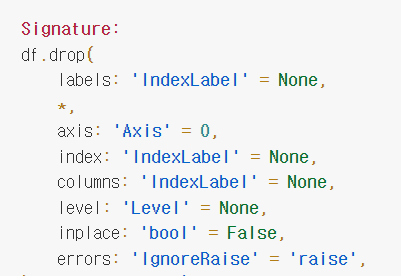

In [143]:
# (2) del
## 열 삭제

del df['etc']
df

,index,country,rank,grade,president,new_grade
0,0,kor,1,A,yoon,True
1,1,usa,2,B,biden,True
2,2,china,3,C,kishida,False
4,7,singapore,4,D,jao,False


# Pandas Quiz

In [151]:
import pandas as pd

data = {
    '영화' : ['명량', '극한직업', '신과함께', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270],
    '평점' : [8.88, 9.20, 8.73,9.16, 8.62, 7.64, 8.83, 9.19]
}

df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.19


In [153]:
df.columns

Index(['영화', '개봉 연도', '관객 수', '평점'], dtype='object')

### (1) 영화 정보만

In [154]:
df['영화']

0         명량
1       극한직업
2       신과함께
3       국제시장
4         괴물
5        도둑들
6    7번방의 선물
7         암살
Name: 영화, dtype: object

In [158]:
df.loc[:, ['영화']]

,영화
0,명량
1,극한직업
2,신과함께
3,국제시장
4,괴물
5,도둑들
6,7번방의 선물
7,암살


In [157]:
df.iloc[:, 0]

0         명량
1       극한직업
2       신과함께
3       국제시장
4         괴물
5        도둑들
6    7번방의 선물
7         암살
Name: 영화, dtype: object

### (2) 영화, 평점 정보만

In [159]:
df[['영화','평점']]

,영화,평점
0,명량,8.88
1,극한직업,9.20
2,신과함께,8.73
3,국제시장,9.16
4,괴물,8.62
5,도둑들,7.64
6,7번방의 선물,8.83
7,암살,9.19


In [160]:
df.loc[:, ['영화','평점']]

,영화,평점
0,명량,8.88
1,극한직업,9.20
2,신과함께,8.73
3,국제시장,9.16
4,괴물,8.62
5,도둑들,7.64
6,7번방의 선물,8.83
7,암살,9.19


In [161]:
df.iloc[:, [0,3]]

,영화,평점
0,명량,8.88
1,극한직업,9.20
2,신과함께,8.73
3,국제시장,9.16
4,괴물,8.62
5,도둑들,7.64
6,7번방의 선물,8.83
7,암살,9.19


### (3) 영화, 개봉년도 정보
- 2015년도 이후 개봉한 영화

In [163]:
year_df = df[['영화','개봉 연도']]
year_df

,영화,개봉 연도
0,명량,2014
1,극한직업,2019
2,신과함께,2017
3,국제시장,2014
4,괴물,2006
5,도둑들,2012
6,7번방의 선물,2013
7,암살,2015


In [165]:
year_df[year_df['개봉 연도'] > 2015]

,영화,개봉 연도
1,극한직업,2019
2,신과함께,2017


### (4) 주어진 계산식 참고하여 '추천 점수' column 추가

In [166]:
df['추천 점수'] = (df['개봉 연도'] * df['평점']) // 100
df

,영화,개봉 연도,관객 수,평점,추천 점수
0,명량,2014,1761,8.88,178.0
1,극한직업,2019,1626,9.20,185.0
2,신과함께,2017,1441,8.73,176.0
3,국제시장,2014,1426,9.16,184.0
4,괴물,2006,1301,8.62,172.0
5,도둑들,2012,1298,7.64,153.0
6,7번방의 선물,2013,1281,8.83,177.0
7,암살,2015,1270,9.19,185.0


### (5) '개봉년도' 기준 내림차순

In [170]:
df.sort_values?

In [169]:
df.sort_values(by='개봉 연도', ascending=False)

,영화,개봉 연도,관객 수,평점,추천 점수
1,극한직업,2019,1626,9.20,185.0
2,신과함께,2017,1441,8.73,176.0
7,암살,2015,1270,9.19,185.0
0,명량,2014,1761,8.88,178.0
3,국제시장,2014,1426,9.16,184.0
6,7번방의 선물,2013,1281,8.83,177.0
5,도둑들,2012,1298,7.64,153.0
4,괴물,2006,1301,8.62,172.0


## 집합(Aggregation) 함수

In [171]:
# DataFrame 생성

data = {
    'country': ["kor", "usa", "china", "japan"],
    'rank': [1,2,3,4],
    'grade': ["A","B","C","D"]
}

# print(data)
df = pd.DataFrame(data)
df

,country,rank,grade
0,kor,1,A
1,usa,2,B
2,china,3,C
3,japan,4,D


In [172]:
df.sum()

country    korusachinajapan
rank                     10
grade                  ABCD
dtype: object

In [173]:
df.mean()

C:\Users\sunah\AppData\Local\Temp\ipykernel_32472\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


rank    2.5
dtype: float64

In [174]:
df.max()

country    usa
rank         4
grade        D
dtype: object

In [175]:
df.min()

country    china
rank           1
grade          A
dtype: object

In [179]:
df.sort_values(by=['country','grade'], ascending=[True, False])  # 컬럼별 ascending 조건 각각 다르게 줄 수 있음

,country,rank,grade
2,china,3,C
3,japan,4,D
0,kor,1,A
1,usa,2,B


## NaN 데이터 처리하기

In [181]:
df['check'] = np.nan
df

,country,rank,grade,check
0,kor,1,A,NaN
1,usa,2,B,NaN
2,china,3,C,NaN
3,japan,4,D,NaN


In [184]:
print(df.isna())
df.isnull() # 위와 같음

   country   rank  grade  check
0    False  False  False   True
1    False  False  False   True
2    False  False  False   True
3    False  False  False   True


,country,rank,grade,check
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True


In [185]:
### fillna() : NaN을 True로 채우기

In [186]:
df.fillna(value=True)

,country,rank,grade,check
0,kor,1,A,True
1,usa,2,B,True
2,china,3,C,True
3,japan,4,D,True


In [188]:
df.fillna(value="채워")
# df.fillna(value="채워", inplace=True)

,country,rank,grade,check
0,kor,1,A,채워
1,usa,2,B,채워
2,china,3,C,채워
3,japan,4,D,채워


## dropna()

In [189]:
df.dropna(how='any') # NaN이 포함된 행 모두 제거

,country,rank,grade,check


In [190]:
df.dropna(how='all')  # 행 전체가 NaN인 것 제거

,country,rank,grade,check
0,kor,1,A,NaN
1,usa,2,B,NaN
2,china,3,C,NaN
3,japan,4,D,NaN


## astype()

In [193]:
df['rank'].astype(int)

0    1
1    2
2    3
3    4
Name: rank, dtype: int32

In [194]:
df['grade'].dtypes  # dtype('O') => Object = 문자열

dtype('O')